In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
cab_data = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer_id = pd.read_csv('Customer_ID.csv')
transaction_id = pd.read_csv('Transaction_ID.csv')

In [39]:
print("cab_data original shape:", cab_data.shape)
cab_data.drop_duplicates()
print("cab_data (after removing duplicates) shape:", cab_data.shape)
cab_data.dropna()
print("cab_data (after removing NA) shape:", cab_data.shape)

print("city original shape:", city.shape)
city.drop_duplicates()
print("city (after removing duplicates) shape:", city.shape)
city.dropna()
print("city (after removing NA) shape:", city.shape)

print("customer_id original shape:", customer_id.shape)
customer_id.drop_duplicates()
print("customer_id (after removing duplicates) shape:", customer_id.shape)
customer_id.dropna()
print("customer_id (after removing NA) shape:", customer_id.shape)

print("transaction_id original shape:", transaction_id.shape)
transaction_id.drop_duplicates()
print("transaction_id (after removing duplicates) shape:", transaction_id.shape)
transaction_id.dropna()
print("transaction_id (after removing NA) shape:", transaction_id.shape)
# Conclusion: No duplicate rows and NA values -> shape of all dataframes remained the same

cab_data original shape: (359392, 7)
cab_data (after removing duplicates) shape: (359392, 7)
cab_data (after removing NA) shape: (359392, 7)
city original shape: (20, 3)
city (after removing duplicates) shape: (20, 3)
city (after removing NA) shape: (20, 3)
customer_id original shape: (49171, 4)
customer_id (after removing duplicates) shape: (49171, 4)
customer_id (after removing NA) shape: (49171, 4)
transaction_id original shape: (440098, 3)
transaction_id (after removing duplicates) shape: (440098, 3)
transaction_id (after removing NA) shape: (440098, 3)


In [40]:
# Merging all datasets together based on foreign keys
master_data = (transaction_id.merge(cab_data, how= 'inner')).merge(customer_id, how='inner').merge(city, how= 'inner')

# Inserted new column of profits made with one transaction
master_data.insert(loc=9,
          column='Profit',
          value=master_data['Price Charged'] - master_data['Cost of Trip'])

# Inserted price of per KM of travel
master_data.insert(loc=6,
          column='Price per KM',
          value=master_data['Price Charged'] / master_data['KM Travelled'])

# Inserted price of per KM of travel
master_data.insert(loc=7,
          column='Profit per KM',
          value=master_data['Profit'] / master_data['KM Travelled'])

index = 0
for date in master_data['Date of Travel']:
    days_since_2016 = date - 42364
    if days_since_2016 >= 0 and days_since_2016 <= 335:
        master_data.at[index, 'Year'] = 2016
    elif days_since_2016 <= 700:
        master_data.at[index, 'Year'] = 2017
    else:
        master_data.at[index, 'Year'] = 2018
    index = index + 1
    
rides_count = master_data['Customer ID'].value_counts().rename_axis('Customer ID').reset_index(name='Number of Rides')
master_data = pd.merge(master_data, rides_count, on='Customer ID')

master_data

Transaction ID  Customer ID Payment_Mode  Date of Travel     Company  \
0             10000011        29290         Card           42377    Pink Cab   
1             10351127        29290         Cash           43302  Yellow Cab   
2             10412921        29290         Card           43427  Yellow Cab   
3             10000012        27703         Card           42375    Pink Cab   
4             10320494        27703         Card           43211  Yellow Cab   
...                ...          ...          ...             ...         ...   
359387        10307228        51406         Cash           43162  Yellow Cab   
359388        10319775        51406         Cash           43203  Yellow Cab   
359389        10347676        51406         Card           43287  Yellow Cab   
359390        10358624        51406         Cash           43314  Yellow Cab   
359391        10370709        51406         Card           43342  Yellow Cab   

                 City  Price per KM  Profit per KM  KM Travelled  \
0          ATLANTA GA     12.182266       1.882266         30.45   
1          ATLANTA GA     22.859870      10.739870         26.19   
2          ATLANTA GA     18.614571       4.574571         42.55   
3          ATLANTA GA     12.526904       0.826904         28.62   
4          ATLANTA GA     19.821330       6.981330         36.38   
...               ...           ...            ...           ...   
359387  WASHINGTON DC     17.420052       3.740052         38.40   
359388  WASHINGTON DC     18.935574       6.455574          3.57   
359389  WASHINGTON DC     14.150469      -0.249531         23.46   
359390  WASHINGTON DC     12.979348      -0.220652         27.60   
359391  WASHINGTON DC     13.233353       0.753353         34.24   

        Price Charged  Cost of Trip    Profit  Gender  Age  \
0              370.95      313.6350   57.3150    Male   28   
1              598.70      317.4228  281.2772    Male   28   
2              792.05      597.4020  194.6480    Male   28   
3              358.52      334.8540   23.6660    Male   27   
4              721.10      467.1192  253.9808    Male   27   
...               ...           ...       ...     ...  ...   
359387         668.93      525.3120  143.6180  Female   29   
359388          67.60       44.5536   23.0464  Female   29   
359389         331.97      337.8240   -5.8540  Female   29   
359390         358.23      364.3200   -6.0900  Female   29   
359391         453.11      427.3152   25.7948  Female   29   

        Income (USD/Month) Population      Users    Year  Number of Rides  
0                    10813   814,885     24,701   2016.0                3  
1                    10813   814,885     24,701   2018.0                3  
2                    10813   814,885     24,701   2018.0                3  
3                     9237   814,885     24,701   2016.0                4  
4                     9237   814,885     24,701   2018.0                4  
...                    ...        ...        ...     ...              ...  
359387                6829   418,859    127,001   2018.0                6  
359388                6829   418,859    127,001   2018.0                6  
359389                6829   418,859    127,001   2018.0                6  
359390                6829   418,859    127,001   2018.0                6  
359391                6829   418,859    127,001   2018.0                6  

[359392 rows x 19 columns]

In [41]:
print("Pink Cab Rows:", len(master_data[master_data["Company"]=="Pink Cab"]))
print("Yellow Cab Rows:",len(master_data[master_data["Company"]=="Yellow Cab"]))
print("Yellow Cab has", 274681/84711, "times as many rows as Pink Cab")
# Conclusion: Yellow Cab dataset is much more represented than Pink Cab Dataset

Pink Cab Rows: 84711
Yellow Cab Rows: 274681
Yellow Cab has 3.2425659005323983 times as many rows as Pink Cab


In [42]:
print("Average age of Pink Cab Customers:", master_data.loc[master_data['Company'] == 'Pink Cab', 'Age'].mean())
print("Average age of Yellow Cab Customers:", master_data.loc[master_data['Company'] == 'Yellow Cab', 'Age'].mean())
# Conclusion: Essentially the same average ages (almost identical)

Average age of Pink Cab Customers: 35.322413854162974
Average age of Yellow Cab Customers: 35.34111205361856


In [43]:
print("Average income of Pink Cab Customers:", master_data.loc[master_data['Company'] == 'Pink Cab', 'Income (USD/Month)'].mean())
print("Average income of Yellow Cab Customers:", master_data.loc[master_data['Company'] == 'Yellow Cab', 'Income (USD/Month)'].mean())
# Conclusion: Essentially the same average incomes (almost identical)

Average income of Pink Cab Customers: 15059.04713673549
Average income of Yellow Cab Customers: 15045.669816987705


In [44]:
print("Average Profit of Pink Cab Customers:", master_data.loc[master_data['Company'] == 'Pink Cab', 'Profit'].mean())
print("Average Profit of Yellow Cab Customers:", master_data.loc[master_data['Company'] == 'Yellow Cab', 'Profit'].mean())
# Conclusion: Profit margins for Yellow Cabs are much higher

Average Profit of Pink Cab Customers: 62.65217410961977
Average Profit of Yellow Cab Customers: 160.25998584103021


In [45]:
print("Average Price per KM of Pink Cab Customers:", master_data.loc[master_data['Company'] == 'Pink Cab', 'Price per KM'].mean())
print("Average Price per KM of Yellow Cab Customers:", master_data.loc[master_data['Company'] == 'Yellow Cab', 'Price per KM'].mean())

Average Price per KM of Pink Cab Customers: 13.768510007062726
Average Price per KM of Yellow Cab Customers: 20.306072681788127


In [46]:
print("Average Profit per KM of Pink Cab Customers:", 
      master_data.loc[master_data['Company'] == 'Pink Cab', 'Profit per KM'].mean())
print("Average Profit per KM of Yellow Cab Customers:", 
      master_data.loc[master_data['Company'] == 'Yellow Cab', 'Profit per KM'].mean())

Average Profit per KM of Pink Cab Customers: 2.769907700396534
Average Profit per KM of Yellow Cab Customers: 7.105507808353114


Pink Cab average profit made per Transaction 2016: 62.78542221058146
Pink Cab average profit made per Transaction 2017: 67.44435470475032
Pink Cab average profit made per Transaction 2018: 58.40679605784178


Yellow Cab average profit made per Transaction 2016: 171.3991760641048
Yellow Cab average profit made per Transaction 2017: 171.13147693265412
Yellow Cab average profit made per Transaction 2018: 143.47844697502347


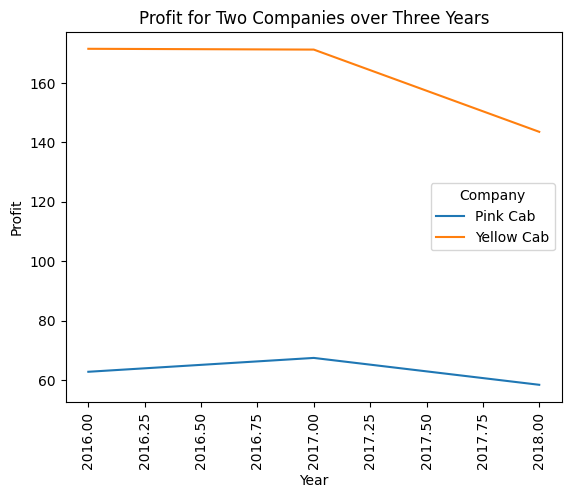

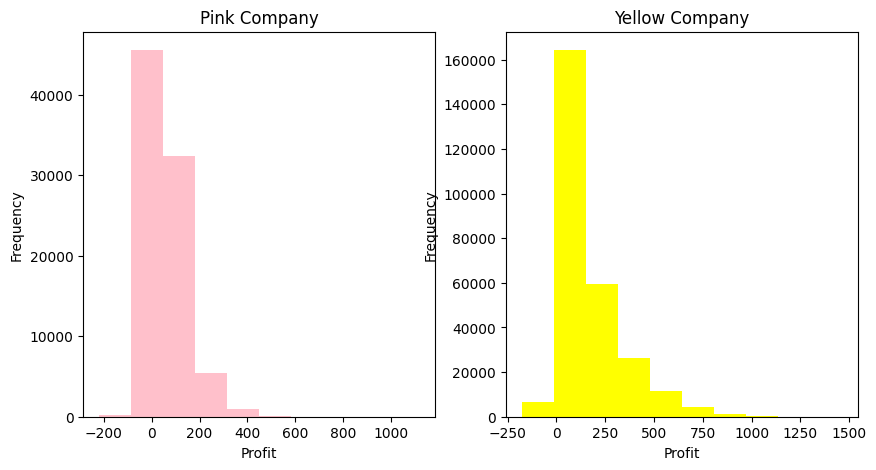

In [47]:
# Hypothesis: Yellow Cab will higher profit margins based on profits from every transaction
# Motivation: This will show whether one company makes a higher profit than the other
selected_rows = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Year'] == 2016)]

pink_2016 = selected_rows['Profit'].mean()
print("Pink Cab average profit made per Transaction 2016:", pink_2016)

selected_rows = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Year'] == 2017)]

pink_2017 = selected_rows['Profit'].mean()
print("Pink Cab average profit made per Transaction 2017:", pink_2017)

selected_rows = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Year'] == 2018)]

pink_2018 = selected_rows['Profit'].mean()
print("Pink Cab average profit made per Transaction 2018:", pink_2018)
print('\n')

selected_rows = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Year'] == 2016)]

yellow_2016 = selected_rows['Profit'].mean()
print("Yellow Cab average profit made per Transaction 2016:", yellow_2016)

selected_rows = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Year'] == 2017)]

yellow_2017 = selected_rows['Profit'].mean()
print("Yellow Cab average profit made per Transaction 2017:", yellow_2017)

selected_rows = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Year'] == 2018)]

yellow_2018 = selected_rows['Profit'].mean()
print("Yellow Cab average profit made per Transaction 2018:", yellow_2018)

profit_data = pd.DataFrame({
    'Year': [2016, 2017, 2018, 2016, 2017, 2018],
    'Company': ['Pink Cab', 'Pink Cab', 'Pink Cab', 'Yellow Cab', 'Yellow Cab', 'Yellow Cab'],
    'Profit': [pink_2016, pink_2017, pink_2018, yellow_2016, yellow_2017, yellow_2018]
})

pivot_table = pd.pivot_table(profit_data, values='Profit', index='Year', columns='Company')

# Plotting the pivot table as a line graph
pivot_table.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Profit for Two Companies over Three Years')
plt.xticks(rotation=90)
plt.show()

pink_data = master_data[master_data['Company'] == 'Pink Cab']
yellow_data = master_data[master_data['Company'] == 'Yellow Cab']

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.hist(pink_data['Profit'], bins=10, color='pink')
ax1.set_title('Pink Company')
ax1.set_xlabel('Profit')
ax1.set_ylabel('Frequency')

ax2.hist(yellow_data['Profit'], bins=10, color='yellow')
ax2.set_title('Yellow Company')
ax2.set_xlabel('Profit')
ax2.set_ylabel('Frequency')

plt.show()
# Conclusion: This shows that the most frequent profit margins per transaction for Pink Cab hovers around 0
# Conslusion: This shows that the most frequent profit margins per transaction for Yellow Cab covers around > 0
# This confirms my hypothesis that Yellow Cab has higher profit margins and shows Yellow Cab is a better investment

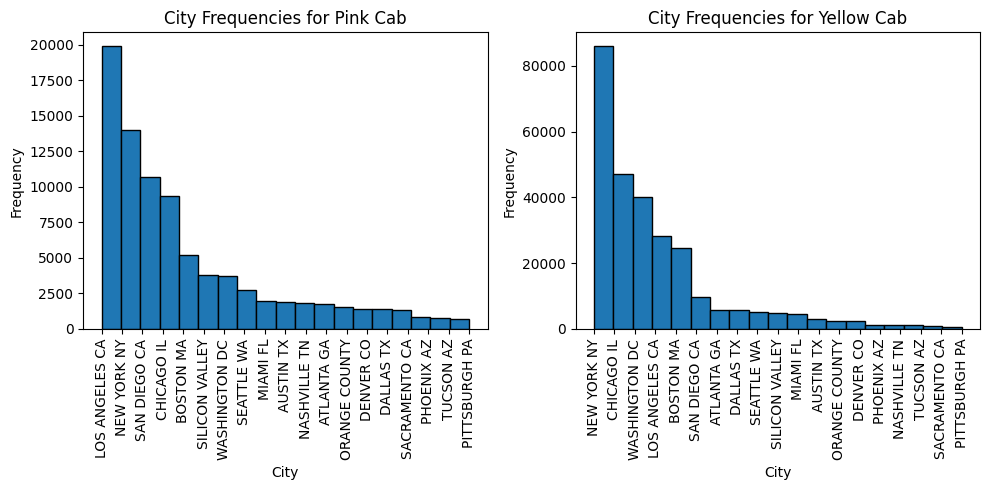

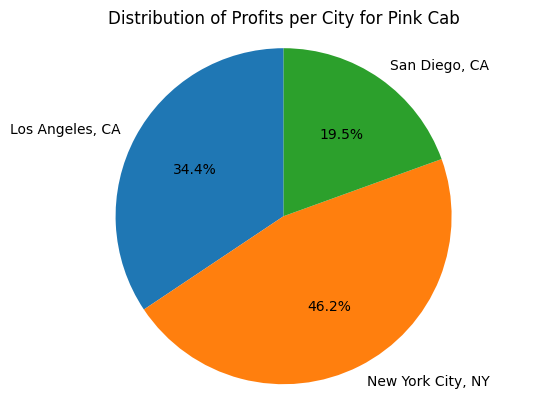

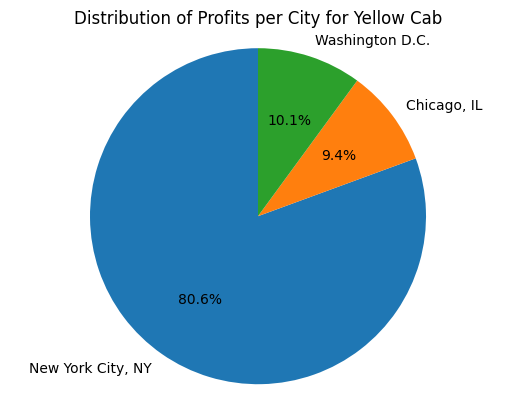

In [48]:
# Hypothesis: Yellow Cab will have a more equal distribution of their profits per top locations
# Motivation: Having a more equal distribution of profits coming from different locations can be safer
# Motivation: During local economics downturns, they will less likely take a hit to their profits

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i, company in enumerate(master_data['Company'].unique()):
    city_counts = master_data.loc[master_data['Company'] == company, 'City'].value_counts()
    axs[i].hist(city_counts.index, weights=city_counts.values, bins=len(city_counts), edgecolor='black')
    axs[i].set_title(f'City Frequencies for {company}')
    axs[i].set_xlabel('City')
    axs[i].set_ylabel('Frequency')
    axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

pink_LA = master_data.loc[(master_data['Company'] == 'Pink Cab') 
                                        & (master_data['City'] == 'LOS ANGELES CA'), 'Profit'].sum()

pink_NYC = master_data.loc[(master_data['Company'] == 'Pink Cab') 
                                        & (master_data['City'] == 'NEW YORK NY'), 'Profit'].sum()

pink_SD = master_data.loc[(master_data['Company'] == 'Pink Cab') 
                                        & (master_data['City'] == 'SAN DIEGO CA'), 'Profit'].sum()

pink_data = [pink_LA, pink_NYC, pink_SD]
pink_labels = ['Los Angeles, CA', 'New York City, NY', 'San Diego, CA']
plt.figure()
plt.pie(pink_data, labels=pink_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Profits per City for Pink Cab')
plt.axis('equal')

plt.show()


yellow_NYC = master_data.loc[(master_data['Company'] == 'Yellow Cab') 
                                        & (master_data['City'] == 'NEW YORK NY'), 'Profit'].sum()

yellow_CHI = master_data.loc[(master_data['Company'] == 'Yellow Cab') 
                                        & (master_data['City'] == 'CHICAGO IL'), 'Profit'].sum()

yellow_DC = master_data.loc[(master_data['Company'] == 'Yellow Cab') 
                                        & (master_data['City'] == 'WASHINGTON DC'), 'Profit'].sum()

yellow_data = [yellow_NYC, yellow_CHI, yellow_DC]
yellow_labels = ['New York City, NY', 'Chicago, IL', 'Washington D.C.']
plt.figure()
plt.pie(yellow_data, labels=yellow_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Profits per City for Yellow Cab')
plt.axis('equal')

plt.show()

# Conclusion: Yellow Cab is very top-heavy, as New York City contributed to 80% of their profits
# Conlusion: Pink Cab is more equal among its top three cities compared to Yellow Cab
# This shows that my initital hypothesis was wrong. Pink Cab actually has the more even distribution among its top three cities
# Thus, this analysis favors Pink Cab slightly more, as their less likely to take losses if there is an local economic downturn in their top cities

Pink Cab Number of Young Adults: 18568
Pink Cab Number of Middle Adults: 9972
Pink Cab Number of Older Adults: 3458
Pink Cab Number of Elderly: 332
Yellow Cab Number of Young Adults: 22960
Yellow Cab Number of Middle Adults: 12324
Yellow Cab Number of Older Adults: 4221
Yellow Cab Number of Elderly: 391


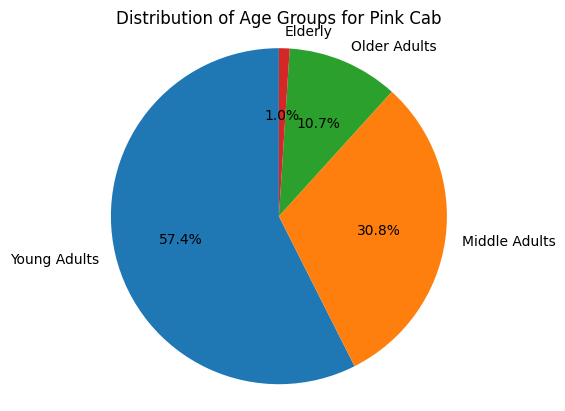

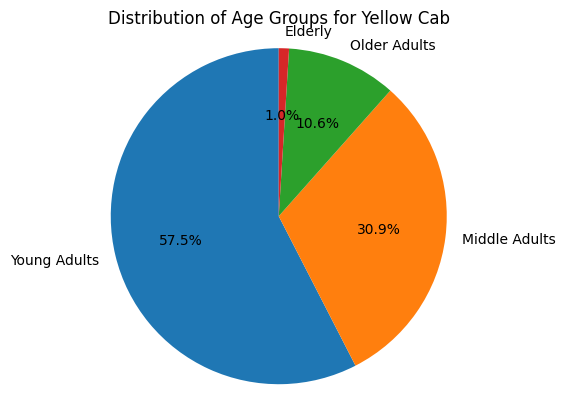

(-1.0999988812321313,
 1.0999992692924283,
 -1.0999999957454365,
 1.0999999997974017)

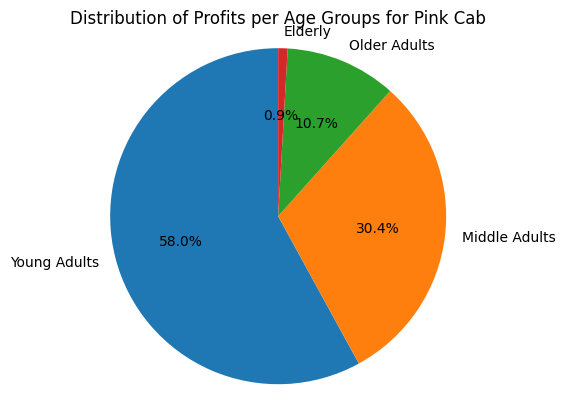

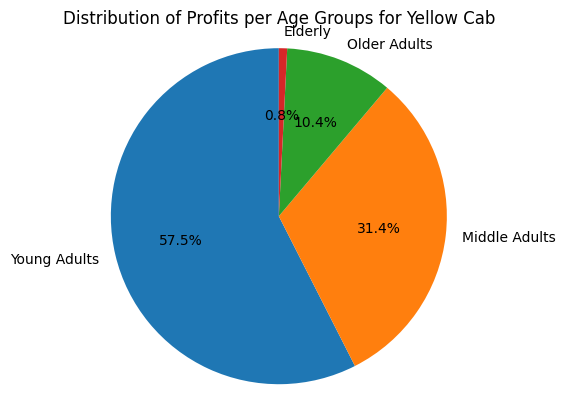

In [49]:
# Hypothesis: Both companies will have similar age groups that contribute to profits and most of them will be younger people
# Motivation: Younger people are more likely to use cab services, this will contribute to most of the profits
# Motivation: Want to confirm whether there is bias/noise in the age demographic part of the dataset

# Identifying age groups
pink_cab_young_adults = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 18) & (master_data['Age'] <= 35), 'Customer ID'].nunique()
pink_cab_middle_adults = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 36) & (master_data['Age'] <= 54), 'Customer ID'].nunique()
pink_cab_older_adults = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 55) & (master_data['Age'] <= 64), 'Customer ID'].nunique()
pink_cab_elderly = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 65), 'Customer ID'].nunique()
print("Pink Cab Number of Young Adults:", pink_cab_young_adults)
print("Pink Cab Number of Middle Adults:", pink_cab_middle_adults)
print("Pink Cab Number of Older Adults:", pink_cab_older_adults)
print("Pink Cab Number of Elderly:", pink_cab_elderly)

yellow_cab_young_adults = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 18) & (master_data['Age'] <= 35), 'Customer ID'].nunique()
yellow_cab_middle_adults = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 36) & (master_data['Age'] <= 54), 'Customer ID'].nunique()
yellow_cab_older_adults = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 55) & (master_data['Age'] <= 64), 'Customer ID'].nunique()
yellow_cab_elderly = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 65), 'Customer ID'].nunique()
print("Yellow Cab Number of Young Adults:", yellow_cab_young_adults)
print("Yellow Cab Number of Middle Adults:", yellow_cab_middle_adults)
print("Yellow Cab Number of Older Adults:", yellow_cab_older_adults)
print("Yellow Cab Number of Elderly:", yellow_cab_elderly)

# Graphing age group distributions
pink_data = [pink_cab_young_adults, pink_cab_middle_adults, pink_cab_older_adults, pink_cab_elderly]
pink_labels = ['Young Adults', 'Middle Adults', 'Older Adults', 'Elderly']
plt.pie(pink_data, labels=pink_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Age Groups for Pink Cab')
plt.axis('equal')

yellow_data = [yellow_cab_young_adults, yellow_cab_middle_adults, yellow_cab_older_adults, yellow_cab_elderly]
yellow_labels = ['Young Adults', 'Middle Adults', 'Older Adults', 'Elderly']
plt.figure()
plt.pie(yellow_data, labels=yellow_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Age Groups for Yellow Cab')
plt.axis('equal')

plt.show()


# Profits per age group
pink_cab_young_adults = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 18) & (master_data['Age'] <= 35), 'Profit'].sum()
pink_cab_middle_adults = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 36) & (master_data['Age'] <= 54), 'Profit'].sum()
pink_cab_older_adults = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 55) & (master_data['Age'] <= 64), 'Profit'].sum()
pink_cab_elderly = master_data.loc[(master_data['Company'] == 'Pink Cab') & (master_data['Age'] >= 65), 'Profit'].sum()

pink_data = [pink_cab_young_adults, pink_cab_middle_adults, pink_cab_older_adults, pink_cab_elderly]
pink_labels = ['Young Adults', 'Middle Adults', 'Older Adults', 'Elderly']
plt.pie(pink_data, labels=pink_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Profits per Age Groups for Pink Cab')
plt.axis('equal')


yellow_cab_young_adults = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 18) & (master_data['Age'] <= 35), 'Profit'].sum()
yellow_cab_middle_adults = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 36) & (master_data['Age'] <= 54), 'Profit'].sum()
yellow_cab_older_adults = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 55) & (master_data['Age'] <= 64), 'Profit'].sum()
yellow_cab_elderly = master_data.loc[(master_data['Company'] == 'Yellow Cab') & (master_data['Age'] >= 65), 'Profit'].sum()

yellow_data = [yellow_cab_young_adults, yellow_cab_middle_adults, yellow_cab_older_adults, yellow_cab_elderly]
yellow_labels = ['Young Adults', 'Middle Adults', 'Older Adults', 'Elderly']
plt.figure()
plt.pie(yellow_data, labels=yellow_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Profits per Age Groups for Yellow Cab')
plt.axis('equal')

# Conclusion - Confirms hypothesis that both companies have relatively similar distribution of age groups
# Conclusion - Hypothesis was correct in that most of the users are young adults for both companies
# Conclusion - Intuively makes sense that the profit distribution is also majority of young adults
# Conclusion - This shows that age groups don't seem to be a big differentiator when analyzing which company is a better invesment

Pink Cab number of cash transactions: 33992
Pink Cab number of card transactions: 50719


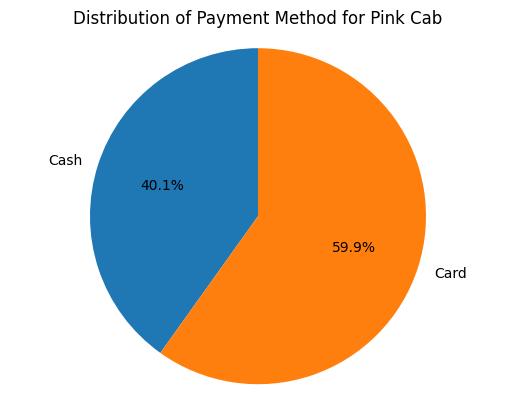

Yellow Cab number of cash transactions: 109896
Yellow Cab number of card transactions: 164785


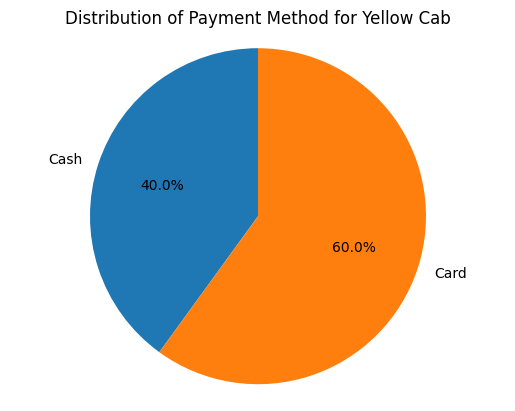

Pink average profit cash transaction: 62.565472228759695
Pink average profit card transaction: 62.71028192590548
Yellow average profit cash transaction: 160.6818743939725
Yellow average profit card transaction: 159.97862610310403


Pink number of card transactions in 2016: 12559
Pink number of card transactions in 2017: 17716
Pink number of card transactions in 2018: 20444
Pink number of cash transactions in 2016: 8440
Pink number of cash transactions in 2017: 11903
Pink number of cash transactions in 2018: 13649


Yellow number of card transactions in 2016: 41731
Yellow number of card transactions in 2017: 57711
Yellow number of card transactions in 2018: 65343
Yellow number of cash transactions in 2016: 27905
Yellow number of cash transactions in 2017: 38672
Yellow number of cash transactions in 2018: 43319




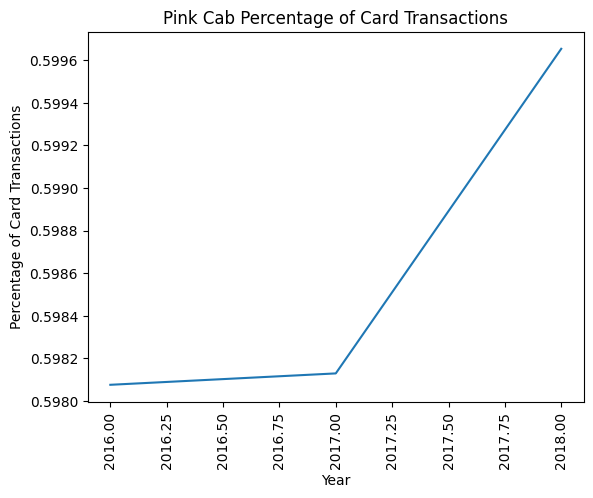

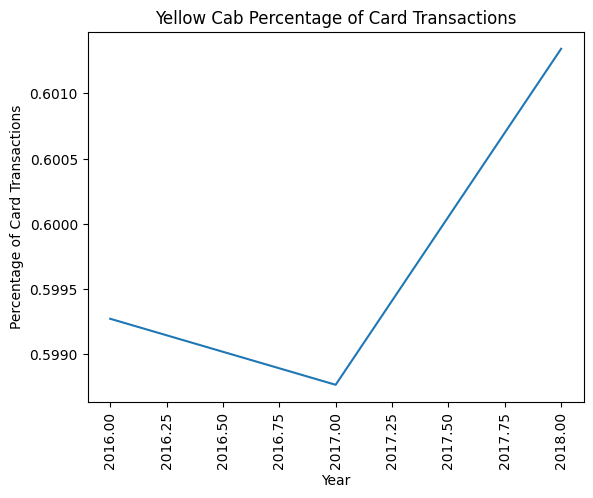

In [50]:
# Hypothesis: Customers will prefer using credit cards over cash
# Motivation: More and more people are utilizing digital currency and will contribute to most of the profits

pink_num_cash = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Cash')].shape[0]

pink_num_card = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Card')].shape[0]

print("Pink Cab number of cash transactions:", pink_num_cash)
print("Pink Cab number of card transactions:", pink_num_card)

pink_data = [pink_num_cash, pink_num_card]
pink_labels = ['Cash', 'Card']
plt.figure()
plt.pie(pink_data, labels=pink_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Payment Method for Pink Cab')
plt.axis('equal')
plt.show()


yellow_num_cash = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Cash')].shape[0]

yellow_num_card = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Card')].shape[0]

print("Yellow Cab number of cash transactions:", yellow_num_cash)
print("Yellow Cab number of card transactions:", yellow_num_card)

yellow_data = [yellow_num_cash, yellow_num_card]
yellow_labels = ['Cash', 'Card']
plt.figure()
plt.pie(yellow_data, labels=yellow_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Payment Method for Yellow Cab')
plt.axis('equal')
plt.show()



pink_cash_avg_profit = master_data.loc[(master_data['Company'] == 'Pink Cab') &
                                       (master_data['Payment_Mode'] == 'Cash'),
                                       'Profit'].mean()

pink_card_avg_profit = master_data.loc[(master_data['Company'] == 'Pink Cab') &
                                       (master_data['Payment_Mode'] == 'Card'),
                                       'Profit'].mean()

yellow_cash_avg_profit = master_data.loc[(master_data['Company'] == 'Yellow Cab') &
                                       (master_data['Payment_Mode'] == 'Cash'),
                                       'Profit'].mean()

yellow_card_avg_profit = master_data.loc[(master_data['Company'] == 'Yellow Cab') &
                                       (master_data['Payment_Mode'] == 'Card'),
                                       'Profit'].mean()

print("Pink average profit cash transaction:", pink_cash_avg_profit)
print("Pink average profit card transaction:", pink_card_avg_profit)
print("Yellow average profit cash transaction:", yellow_cash_avg_profit)
print("Yellow average profit card transaction:", yellow_card_avg_profit)
print("\n")



# Hypothesis: Number of card transactions will increase more for Yellow Cab
# Motivation: This shows how customers are changing their spending behavior in accordance to change in technology

pink_2016_card_num = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Card') & (master_data['Year'] == 2016)].shape[0]

pink_2017_card_num = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Card') & (master_data['Year'] == 2017)].shape[0]

pink_2018_card_num = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Card') & (master_data['Year'] == 2018)].shape[0]


pink_2016_cash_num = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Cash') & (master_data['Year'] == 2016)].shape[0]

pink_2017_cash_num = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Cash') & (master_data['Year'] == 2017)].shape[0]

pink_2018_cash_num = master_data.loc[(master_data['Company'] == 'Pink Cab') & 
                                (master_data['Payment_Mode'] == 'Cash') & (master_data['Year'] == 2018)].shape[0]

print("Pink number of card transactions in 2016:", pink_2016_card_num)
print("Pink number of card transactions in 2017:", pink_2017_card_num)
print("Pink number of card transactions in 2018:", pink_2018_card_num)
print("Pink number of cash transactions in 2016:", pink_2016_cash_num)
print("Pink number of cash transactions in 2017:", pink_2017_cash_num)
print("Pink number of cash transactions in 2018:", pink_2018_cash_num)
print("\n")

yellow_2016_card_num = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Card') & (master_data['Year'] == 2016)].shape[0]

yellow_2017_card_num = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Card') & (master_data['Year'] == 2017)].shape[0]

yellow_2018_card_num = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Card') & (master_data['Year'] == 2018)].shape[0]

yellow_2016_cash_num = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Cash') & (master_data['Year'] == 2016)].shape[0]

yellow_2017_cash_num = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Cash') & (master_data['Year'] == 2017)].shape[0]

yellow_2018_cash_num = master_data.loc[(master_data['Company'] == 'Yellow Cab') & 
                                (master_data['Payment_Mode'] == 'Cash') & (master_data['Year'] == 2018)].shape[0]

print("Yellow number of card transactions in 2016:", yellow_2016_card_num)
print("Yellow number of card transactions in 2017:", yellow_2017_card_num)
print("Yellow number of card transactions in 2018:", yellow_2018_card_num)
print("Yellow number of cash transactions in 2016:", yellow_2016_cash_num)
print("Yellow number of cash transactions in 2017:", yellow_2017_cash_num)
print("Yellow number of cash transactions in 2018:", yellow_2018_cash_num)
print('\n')

pink_2016_card_ratio = pink_2016_card_num / (pink_2016_card_num + pink_2016_cash_num)
pink_2017_card_ratio = pink_2017_card_num / (pink_2017_card_num + pink_2017_cash_num)
pink_2018_card_ratio = pink_2018_card_num / (pink_2018_card_num + pink_2018_cash_num)

yellow_2016_card_ratio = yellow_2016_card_num / (yellow_2016_card_num + yellow_2016_cash_num)
yellow_2017_card_ratio = yellow_2017_card_num / (yellow_2017_card_num + yellow_2017_cash_num)
yellow_2018_card_ratio = yellow_2018_card_num / (yellow_2018_card_num + yellow_2018_cash_num)

df = pd.DataFrame({'x': [2016, 2017, 2018], 'y': [pink_2016_card_ratio, pink_2017_card_ratio, pink_2018_card_ratio]})
plt.plot(df['x'], df['y'])
plt.xlabel('Year')
plt.ylabel('Percentage of Card Transactions')
plt.title('Pink Cab Percentage of Card Transactions')
plt.xticks(rotation=90)
plt.show()

df = pd.DataFrame({'x': [2016, 2017, 2018], 'y': [yellow_2016_card_ratio, yellow_2017_card_ratio, yellow_2018_card_ratio]})
plt.plot(df['x'], df['y'])
plt.xlabel('Year')
plt.ylabel('Percentage of Card Transactions')
plt.title('Yellow Cab Percentage of Card Transactions')
plt.xticks(rotation=90)
plt.show()

# Conclusion - Confirms hypothesis that most customers use card as their payment method
# Conclusion - Does not confirm hypothesis that Yellow Cab will have increase % in cards (they're about the same)
# This shows that payment method analysis was very similar between the two companies
# Thus, not the best determinator to determine which company is the better investment

Retained Customers:
 Company
Pink Cab       5775
Yellow Cab    15883
Name: Year, dtype: int64

Lost Customers:

 Company
Pink Cab      26555
Yellow Cab    24013
Name: Year, dtype: int64


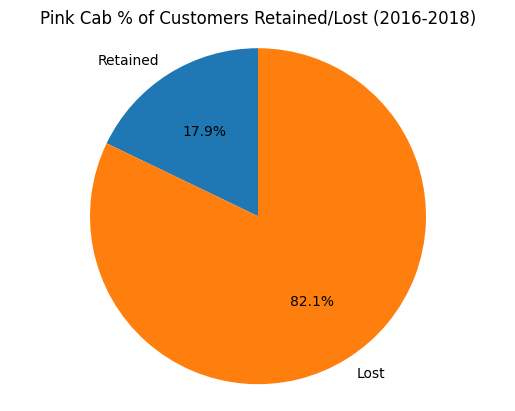

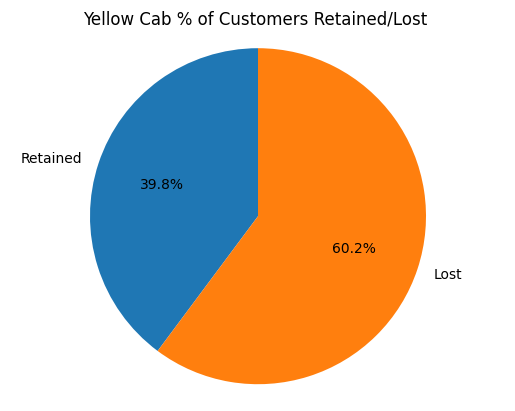

Average number of times a Customer called a Pink Cab in 2016: 1.4256908140403286
Average number of times a Customer called a Pink Cab in 2017: 1.607805884268809
Average number of times a Customer called a Pink Cab in 2018: 1.6921282509430216


Average number of times a Customer called a Yellow Cab in 2016: 2.8874238089314592
Average number of times a Customer called a Yellow Cab in 2017: 3.4912522186402
Average number of times a Customer called a Yellow Cab in 2018: 3.742835491871039


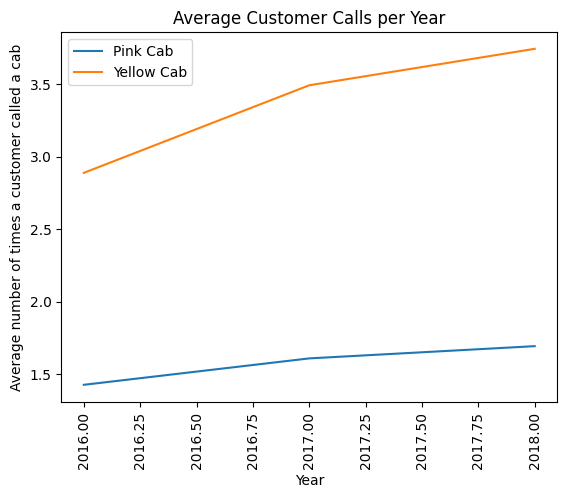

In [51]:
# Hypothesis: Yellow Cab will retain higher % of customers between 2016 and 2018
# Motivation: This might show that Yellow Cab is better at keeping their customers over a period of time

retained_customers = master_data.groupby(['Company', 'Customer ID'])['Year'].nunique()
retained_counts = retained_customers.groupby('Company').apply(lambda x: sum(x == 3))
lost_counts = retained_customers.groupby('Company').apply(lambda x: sum(x < 3))

print("Retained Customers:\n", retained_counts)
print("\nLost Customers:\n\n", lost_counts)


pink_data = [5775, 26555]
pink_labels = ['Retained', 'Lost']
plt.figure()
plt.pie(pink_data, labels=pink_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pink Cab % of Customers Retained/Lost (2016-2018)')
plt.axis('equal')
plt.show()

yellow_data = [15883, 24013]
yellow_labels = ['Retained', 'Lost']
plt.figure()
plt.pie(yellow_data, labels=yellow_labels, autopct='%1.1f%%', startangle=90)
plt.title('Yellow Cab % of Customers Retained/Lost ')
plt.axis('equal')
plt.show()

# Conclusion -------------------------------------------------------------------------------------------------------------------
# The data shows that Pink Cab was only able to retain 17.9% of its customers between 2016 and 2018.
# While Yellow Cab was able to retain 39.8% of its customers between 2016 and 2018. 
# This means that Yellow Cab provided a cab service that a higher percentage of their customers wanted to continue using their service. 
# This shows that Yellow Cab has better quality of services.
# Confirms my hypothesis and shows that Yellow Company is a better investment with this metric.
# -------------------------------------------------------------------------------------------------------------------------------



# Hypothesis: Yellow Cab will have a higher increase in average number of transactions with the same customers
# Motivation: This might further suggest that Yellwo Cab is better at providing their services that customers will want to increase their usage.

pink_cab_2016 = master_data[(master_data['Company'] == 'Pink Cab') & (master_data['Year'] == 2016)]
pink_customer_counts_2016 = pink_cab_2016.groupby('Customer ID')['Customer ID'].count().mean()

pink_cab_2017 = master_data[(master_data['Company'] == 'Pink Cab') & (master_data['Year'] == 2017)]
pink_customer_counts_2017 = pink_cab_2017.groupby('Customer ID')['Customer ID'].count().mean()

pink_cab_2018 = master_data[(master_data['Company'] == 'Pink Cab') & (master_data['Year'] == 2018)]
pink_customer_counts_2018 = pink_cab_2018.groupby('Customer ID')['Customer ID'].count().mean()


print("Average number of times a Customer called a Pink Cab in 2016:", pink_customer_counts_2016)
print("Average number of times a Customer called a Pink Cab in 2017:", pink_customer_counts_2017)
print("Average number of times a Customer called a Pink Cab in 2018:", pink_customer_counts_2018)
print("\n")


yellow_cab_2016 = master_data[(master_data['Company'] == 'Yellow Cab') & (master_data['Year'] == 2016)]
yellow_customer_counts_2016 = yellow_cab_2016.groupby('Customer ID')['Customer ID'].count().mean()

yellow_cab_2017 = master_data[(master_data['Company'] == 'Yellow Cab') & (master_data['Year'] == 2017)]
yellow_customer_counts_2017 = yellow_cab_2017.groupby('Customer ID')['Customer ID'].count().mean()

yellow_cab_2018 = master_data[(master_data['Company'] == 'Yellow Cab') & (master_data['Year'] == 2018)]
yellow_customer_counts_2018 = yellow_cab_2018.groupby('Customer ID')['Customer ID'].count().mean()


print("Average number of times a Customer called a Yellow Cab in 2016:", yellow_customer_counts_2016)
print("Average number of times a Customer called a Yellow Cab in 2017:", yellow_customer_counts_2017)
print("Average number of times a Customer called a Yellow Cab in 2018:", yellow_customer_counts_2018)

pink_customer_counts = [pink_customer_counts_2016, pink_customer_counts_2017, pink_customer_counts_2018]
yellow_customer_counts = [yellow_customer_counts_2016, yellow_customer_counts_2017, yellow_customer_counts_2018]

years = [2016, 2017, 2018]
plt.plot(years, pink_customer_counts, label='Pink Cab')
plt.plot(years, yellow_customer_counts, label='Yellow Cab')
plt.xlabel('Year')
plt.ylabel('Average number of times a customer called a cab')
plt.title('Average Customer Calls per Year')
plt.legend()
plt.xticks(rotation=90)
plt.show()

# Conclusion -------------------------------------------------------------------------------------------------------------------
# The data shows that the average transactions by the same customer per year between 2016 and 2018 grew about 18.7% for Pink Cab.
# The data shows that the average transactions by the same customer per year between 2016 and 2018 grew about 29.6% for Yellow Cab.
# This means that Yellow Cab provided a cab service that customers wanted to increase their usage from 2016 to 2018. 
# This shows that Yellow Cab has better quality of services.
# Confirms my hypothesis and shows that Yellow Company is a better investment with this metric.
# -------------------------------------------------------------------------------------------------------------------------------

In [52]:
'''
Final Conclusion:

The five main categories that I analyzed were:
- Profits
- Locations
- Age Groups
- Payment method
- Customer Retention


General Overview:

Out of those, age groups and payment method were shown to be extremely similar between the two companies. However,
locations, profits, and customer retention were heavily one-sided.


Location Analysis:

For this part, I wanted to see how the profits were distributed between the top three cities that produced the most 
profits for the two companies. Yellow Cab was shown to be extremely top-heavy as nearly 80% of their profits came from
New York City. Whereas, Pink Cab has a more even distribution. In my opinion, I think it is generally safer to have a
more even distribution of profits per locations. Thus, I think that this analysis sides with Pink Cab more. Furthermore,
I do think that this is the weakest determinant out of the three categories that were one-sided.


Profits:

This part favors Yellow Cab in every way. Higher total profits in the three years, higher total profits per year, 
higher profits per KM travelled, and higher profit margins per transaction. Thus, this was a pretty straight forward
interpretation. This sides with Yellow Cab.


Customer Retention:

This was a little more tricky to implement, as I wanted to find how often the same customers wanted to continue to use
each company's cab services. The two main pieces that I looked at was the % of customers that used the cab service in 
2016, also used the cab service in 2018. The other piece is how the average number of cab service calls from 2016 to 
2018 changed for the same customer. From the conclusion above, both pieces support Yellow Cab.


Overall, Yellow Cab clearly performed better on profit analysis and customer retention, while Pink Cab performed better
on how location profits are spread out. Considering that the first two categories are better determinants of how a 
company will be doing in the future, I strongly conclude that Yellow Cab is the better investment.
'''

"\nFinal Conclusion:\n\nThe five main categories that I analyzed were:\n- Profits\n- Locations\n- Age Groups\n- Payment method\n- Customer Retention\n\n\nGeneral Overview:\n\nOut of those, age groups and payment method were shown to be extremely similar between the two companies. However,\nlocations, profits, and customer retention were heavily one-sided.\n\n\nLocation Analysis:\n\nFor this part, I wanted to see how the profits were distributed between the top three cities that produced the most \nprofits for the two companies. Yellow Cab was shown to be extremely top-heavy as nearly 80% of their profits came from\nNew York City. Whereas, Pink Cab has a more even distribution. In my opinion, I think it is generally safer to have a\nmore even distribution of profits per locations. Thus, I think that this analysis sides with Pink Cab more. Furthermore,\nI do think that this is the weakest determinant out of the three categories that were one-sided.\n\n\nProfits:\n\nThis part favors Yello